### Crime visualizations using Open Data DC

In [3]:
import pandas as pd
import numpy as np
import os
from plotnine import *
import scipy.stats as stats 
import warnings
warnings.filterwarnings("ignore")

#### Neighborhood cluster data

In [5]:
##import
clusters = pd.read_csv("../../data/open_data_dc/Neighborhood_Clusters.csv", encoding='utf-8')
clusters.head()

,OBJECTID,WEB_URL,NAME,NBH_NAMES,TYPE,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN
0,1,http://planning.dc.gov/,Cluster 16,"Colonial Village, Shepherd Park, North Portal ...",Original,{8D235E97-D58C-4891-943E-307143103BD9},NaN,NaN,NaN,NaN,0,0
1,2,NaN,Cluster 41,Rock Creek Park,Additional,{939C23A8-8EE2-4B4F-85EE-88281BCCC9A0},NaN,NaN,NaN,NaN,0,0
2,3,http://planning.dc.gov/,Cluster 10,"Hawthorne, Barnaby Woods, Chevy Chase",Original,{8EADC8B8-3DAD-4E5D-AAF8-BF63D8316317},NaN,NaN,NaN,NaN,0,0
3,4,http://planning.dc.gov/,Cluster 17,"Takoma, Brightwood, Manor Park",Original,{5BF4BCEC-5022-4B96-9577-C0246154197C},NaN,NaN,NaN,NaN,0,0
4,5,NaN,Cluster 40,Walter Reed,Additional,{C6705A7B-212E-419A-93CB-DA60707D0C37},NaN,NaN,NaN,NaN,0,0


#### 2024 Crime Data

In [8]:
##import data
crime_2024 = pd.read_csv("../../data/open_data_dc/Crime_Incidents_in_2024.csv", encoding='utf-8')
crime_2024.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,400040.61,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,635657969,NaN
1,399950.92,138510.6000,23168245,2024/05/09 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1800 - 1829 BLOCK OF 4TH STREET NE,399950.920000,138510.600000,...,008702 3,8702.0,Precinct 75,38.914461,-77.000566,NaN,2023/10/12 10:40:00+00,2023/10/12 11:45:00+00,635932226,NaN
2,404689.01,135000.8400,24000194,2024/01/01 11:50:13+00,MIDNIGHT,OTHERS,THEFT/OTHER,4000 - 4099 BLOCK OF E STREET SE,404689.010000,135000.840000,...,007703 2,7703.0,Precinct 103,38.882831,-76.945957,NaN,2024/01/01 10:54:00+00,2024/01/01 11:40:00+00,635932616,NaN
3,401508.58,137047.0200,24000222,2024/01/01 13:56:32+00,DAY,OTHERS,THEFT/OTHER,812 - 899 BLOCK OF BLADENSBURG ROAD NE,401508.580000,137047.020000,...,008903 3,8903.0,Precinct 79,38.901275,-76.982608,NaN,2024/01/01 13:39:00+00,2024/01/01 13:50:00+00,635932617,NaN
4,393930.75,143053.2700,24000236,2024/01/01 14:59:02+00,DAY,OTHERS,THEFT/OTHER,5000 - 5099 BLOCK OF CONNECTICUT AVENUE NW,393930.750000,143053.270000,...,001402 3,1402.0,Precinct 138,38.955362,-77.070022,NaN,2024/01/01 13:51:00+00,2024/01/01 13:54:00+00,635932618,NaN


In [10]:
##join data
with_neighborhoods = pd.merge(crime_2024, clusters, how = "left", left_on = "NEIGHBORHOOD_CLUSTER", right_on = "NAME") 
with_neighborhoods.head()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,NAME,NBH_NAMES,TYPE,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN
0,400040.61,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,Cluster 39,"Congress Heights, Bellevue, Washington Highlands",Original,{EAEFFB60-B831-4B92-B7A5-B827FD2308B2},NaN,NaN,NaN,NaN,0.0,0.0
1,399950.92,138510.6000,23168245,2024/05/09 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1800 - 1829 BLOCK OF 4TH STREET NE,399950.920000,138510.600000,...,Cluster 21,"Edgewood, Bloomingdale, Truxton Circle, Eckington",Original,{6CD3BBE1-241C-435B-AEDC-39FB57117D4B},NaN,NaN,NaN,NaN,0.0,0.0
2,404689.01,135000.8400,24000194,2024/01/01 11:50:13+00,MIDNIGHT,OTHERS,THEFT/OTHER,4000 - 4099 BLOCK OF E STREET SE,404689.010000,135000.840000,...,Cluster 32,"River Terrace, Benning, Greenway, Dupont Park",Original,{CB699FF2-52D9-471F-B48A-89EB5DC0AEBB},NaN,NaN,NaN,NaN,0.0,0.0
3,401508.58,137047.0200,24000222,2024/01/01 13:56:32+00,DAY,OTHERS,THEFT/OTHER,812 - 899 BLOCK OF BLADENSBURG ROAD NE,401508.580000,137047.020000,...,Cluster 23,"Ivy City, Arboretum, Trinidad, Carver Langston",Original,{60D6F49B-A6D4-4EC7-9CBE-95E1A0726E16},NaN,NaN,NaN,NaN,0.0,0.0
4,393930.75,143053.2700,24000236,2024/01/01 14:59:02+00,DAY,OTHERS,THEFT/OTHER,5000 - 5099 BLOCK OF CONNECTICUT AVENUE NW,393930.750000,143053.270000,...,Cluster 10,"Hawthorne, Barnaby Woods, Chevy Chase",Original,{8EADC8B8-3DAD-4E5D-AAF8-BF63D8316317},NaN,NaN,NaN,NaN,0.0,0.0


In [12]:
column_names = with_neighborhoods.columns.to_list()
column_names

['X',
 'Y',
 'CCN',
 'REPORT_DAT',
 'SHIFT',
 'METHOD',
 'OFFENSE',
 'BLOCK',
 'XBLOCK',
 'YBLOCK',
 'WARD',
 'ANC',
 'DISTRICT',
 'PSA',
 'NEIGHBORHOOD_CLUSTER',
 'BLOCK_GROUP',
 'CENSUS_TRACT',
 'VOTING_PRECINCT',
 'LATITUDE',
 'LONGITUDE',
 'BID',
 'START_DATE',
 'END_DATE',
 'OBJECTID_x',
 'OCTO_RECORD_ID',
 'OBJECTID_y',
 'WEB_URL',
 'NAME',
 'NBH_NAMES',
 'TYPE',
 'GLOBALID',
 'CREATOR',
 'CREATED',
 'EDITOR',
 'EDITED',
 'SHAPEAREA',
 'SHAPELEN']

In [14]:
neighborhoods = [
    'Adams Morgan', 'American University Park', 'Anacostia', 'Barnaby Woods', 
    'Capitol Hill', 'Columbia Heights', 'Cleveland Park', 'Dupont', 
    'Foggy Bottom', 'Friendship Heights', 'Georgetown', 'Glover Park', 
    'H Street', 'Logan Circle', 'Mount Pleasant', 'Navy Yard', 
    'NoMa', 'Petworth', 'Shaw', 'Southwest Waterfront', 'Takoma', 
    'Tenleytown', 'The Palisades', 'U Street', 'West End', 'Woodley Park'
]

keywords = '|'.join(neighborhoods)

In [54]:
with_neighborhoods_filter = (with_neighborhoods.filter(["OFFENSE", "NEIGHBORHOOD_CLUSTER", "NBH_NAMES"]))
with_neighborhoods_filter.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES
0,HOMICIDE,Cluster 39,"Congress Heights, Bellevue, Washington Highlands"
1,HOMICIDE,Cluster 21,"Edgewood, Bloomingdale, Truxton Circle, Eckington"
2,THEFT/OTHER,Cluster 32,"River Terrace, Benning, Greenway, Dupont Park"
3,THEFT/OTHER,Cluster 23,"Ivy City, Arboretum, Trinidad, Carver Langston"
4,THEFT/OTHER,Cluster 10,"Hawthorne, Barnaby Woods, Chevy Chase"


In [86]:
with_neighborhoods_filter_ = with_neighborhoods_filter[with_neighborhoods_filter['NBH_NAMES'].str.contains(keywords, case=False, na=False)]
neighborhoods_cleaned = with_neighborhoods_filter_.reset_index(drop = True)

In [88]:
neighborhoods_cleaned.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES
0,THEFT/OTHER,Cluster 32,"River Terrace, Benning, Greenway, Dupont Park"
1,THEFT/OTHER,Cluster 10,"Hawthorne, Barnaby Woods, Chevy Chase"
2,THEFT/OTHER,Cluster 34,"Twining, Fairlawn, Randle Highlands, Penn Bran..."
3,THEFT/OTHER,Cluster 3,"Howard University, Le Droit Park, Cardozo/Shaw"
4,THEFT/OTHER,Cluster 2,"Columbia Heights, Mt. Pleasant, Pleasant Plain..."


In [98]:
neighborhoods_cleaned["COUNT"] = 1

In [116]:
crime_neighborhood = neighborhoods_cleaned.pivot_table(
    index = ['NEIGHBORHOOD_CLUSTER', "NBH_NAMES"], 
    columns = ['OFFENSE'], aggfunc = np.sum, fill_value = 0)

crime_neighborhood = crime_neighborhood.reset_index()

In [120]:
crime_neighborhood.head()

NEIGHBORHOOD_CLUSTER  \
OFFENSE                        
0                  Cluster 1   
1                 Cluster 10   
2                 Cluster 11   
3                 Cluster 12   
4                 Cluster 13   

                                                 NBH_NAMES COUNT  \
OFFENSE                                                    ARSON   
0           Kalorama Heights, Adams Morgan, Lanier Heights     0   
1                    Hawthorne, Barnaby Woods, Chevy Chase     0   
2        Friendship Heights, American University Park, ...     0   
3             North Cleveland Park, Forest Hills, Van Ness     0   
4        Spring Valley, Palisades, Wesley Heights, Foxh...     0   

                                                                          \
OFFENSE ASSAULT W/DANGEROUS WEAPON BURGLARY HOMICIDE MOTOR VEHICLE THEFT   
0                                9       33        0                  58   
1                                2        3        0                  15   
2                                1        9        1                  18   
3                                3        3        1                  22   
4                                0       12        0                  12   

                                                    
OFFENSE ROBBERY SEX ABUSE THEFT F/AUTO THEFT/OTHER  
0            33         5          125         426  
1             2         1           88          96  
2             6         2           83         220  
3             5         1           63         177  
4             1         0           59          42

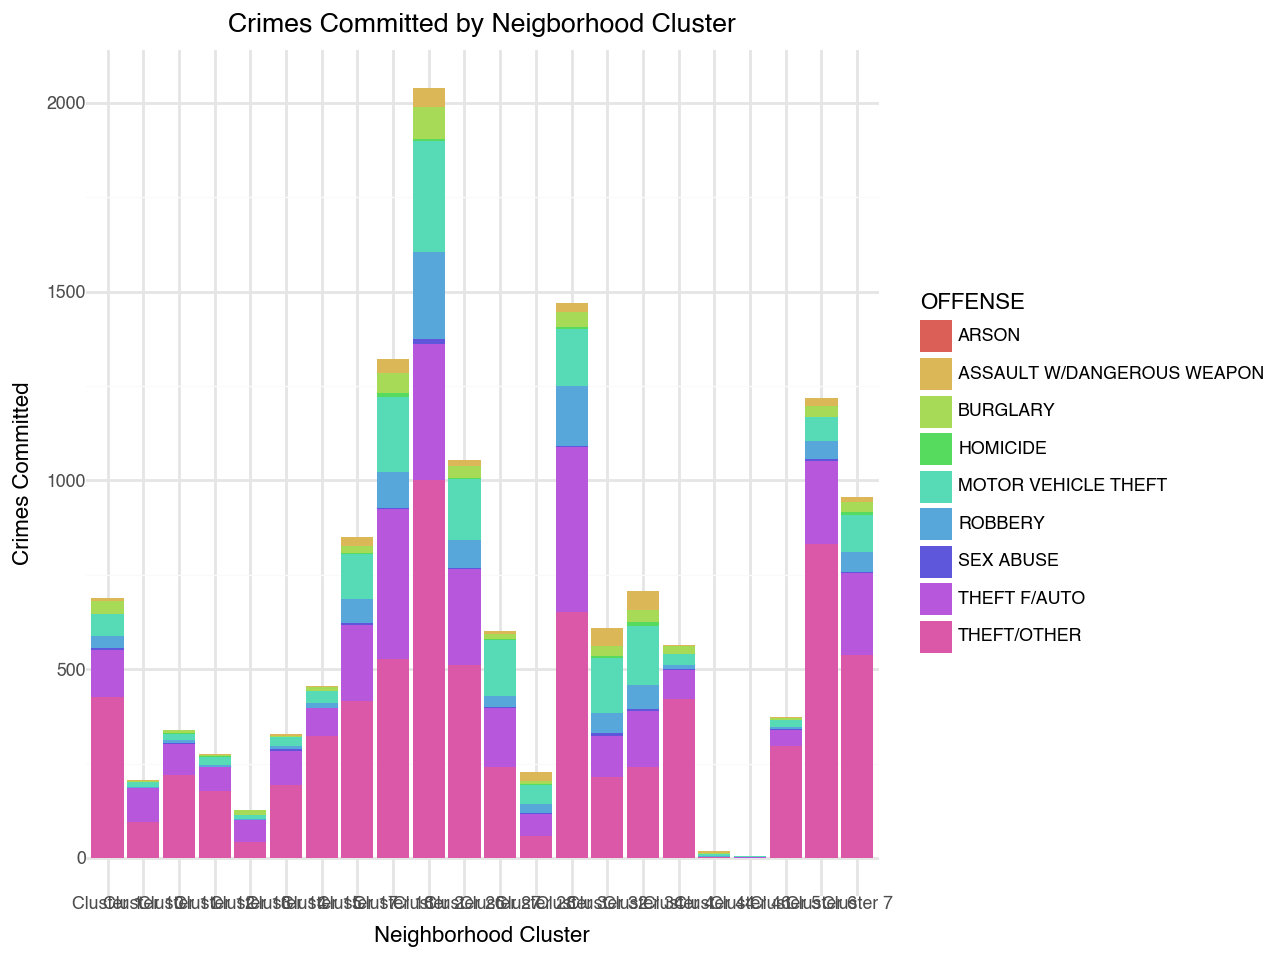

In [162]:
# step 1: data
(ggplot(data=neighborhoods_cleaned) + 

# step 2: geom
 geom_bar(

# step 3: aesthethics as variable
     aes(x="NEIGHBORHOOD_CLUSTER", fill="OFFENSE"), stat="count") +

    theme_minimal(base_size=8) + 
    #theme(legend_position='none') + 


# step labels: edit the labels of the graph
labs(x="Neighborhood Cluster", y="Crimes Committed", title="Crimes Committed by Neigborhood Cluster"))